In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [3]:
train_dir= '../input/emotion-detection-fer/train'
test_dir= '../input/emotion-detection-fer/test'

In [24]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode = "grayscale",
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode = "grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [26]:
baseMapNum = 32
weight_decay = 1e-4
model = tf.keras.Sequential()

model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(7, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)       

In [27]:

opt_rms = tf.keras.optimizers.RMSprop(lr=0.0005,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.001)

In [28]:
history = model.fit_generator(train_generator, epochs=20, validation_data=validation_generator,callbacks=[reduce_lr])

Epoch 1/20
449/449 [==============================] - 45s 94ms/step - loss: 2.1122 - accuracy: 0.2454 - val_loss: 1.7609 - val_accuracy: 0.3569
Epoch 2/20
449/449 [==============================] - 42s 93ms/step - loss: 1.5911 - accuracy: 0.4086 - val_loss: 1.3702 - val_accuracy: 0.4850
Epoch 3/20
449/449 [==============================] - 41s 92ms/step - loss: 1.4029 - accuracy: 0.4761 - val_loss: 1.2881 - val_accuracy: 0.5241
Epoch 4/20
449/449 [==============================] - 42s 92ms/step - loss: 1.3007 - accuracy: 0.5165 - val_loss: 1.2284 - val_accuracy: 0.5437
Epoch 5/20
449/449 [==============================] - 41s 92ms/step - loss: 1.2480 - accuracy: 0.5363 - val_loss: 1.1830 - val_accuracy: 0.5607
Epoch 6/20
449/449 [==============================] - 42s 93ms/step - loss: 1.1932 - accuracy: 0.5654 - val_loss: 1.1835 - val_accuracy: 0.5726
Epoch 7/20
449/449 [==============================] - 41s 92ms/step - loss: 1.1746 - accuracy: 0.5717 - val_loss: 1.1452 - val_accuracy:

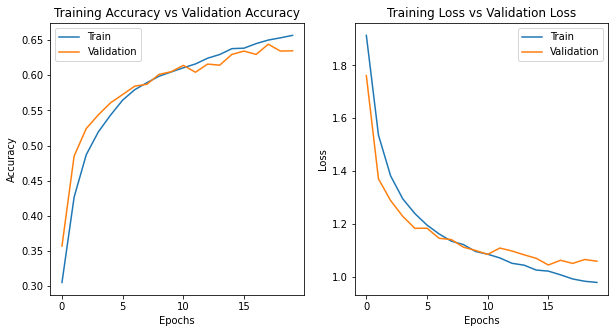

In [29]:
fig , ax = plt.subplots(1,2)
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(10,5)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend(['Train', 'Validation'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['Train', 'Validation'], loc='best')

plt.show()

In [39]:
model.save('emotion_detection.h5')

(48, 48)


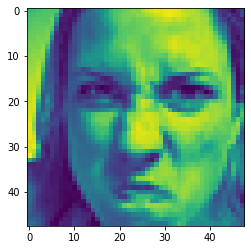

In [37]:

img=cv2.imread('../input/emotion-detection-fer/test/angry/im108.png',0)
img1=cv2.resize(img,(48,48))
print(img.shape)
plt.imshow(img)
plt.show()

In [41]:
img1 = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img1 = img.reshape(1,48,48,1)
result = model.predict(img1)
result = list(result[0])
print(result)
labels={0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}
label=np.argmax(result)
print(labels[label])

[1.0, 0.0, 5.8809755e-19, 0.0, 0.0, 0.0, 0.0]
Angry
